# Evaluation Metrics and Scoring

In [3]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

## Upoštevanje končnega cilja

## Metrics for Binary Classification

### Kinds of errors

### Imbalanced datasets

In [1]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

digits = load_digits()

y = digits.target == 9

X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=0)

In [4]:
from sklearn.dummy import DummyClassifier

dummy_majority = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
pred_most_frequent = dummy_majority.predict(X_test)

print(f"Unique predicted labels: {np.unique(pred_most_frequent)}")
print(f"Test score: {dummy_majority.score(X_test, y_test):.2f}")

Unique predicted labels: [False]
Test score: 0.90


In [5]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
pred_tree = tree.predict(X_test)

print(f"Test score: {tree.score(X_test, y_test):.2f}")

Test score: 0.92


In [6]:
from sklearn.linear_model import LogisticRegression

dummy = DummyClassifier(strategy="stratified", random_state=42).fit(X_train, y_train)
pred_dummy = dummy.predict(X_test)
print(f"dummy score: {dummy.score(X_test, y_test):.2f}")

logreg = LogisticRegression(C=0.1, max_iter=10000, solver="liblinear").fit(X_train, y_train)
pred_logreg = logreg.predict(X_test)
print(f"logreg score: {logreg.score(X_test, y_test):.2f}")

dummy score: 0.83
logreg score: 0.98


### Confusion matrices

In [7]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, pred_logreg)

print(f"Confusion matrix:\n{confusion}")

Confusion matrix:
[[401   2]
 [  8  39]]


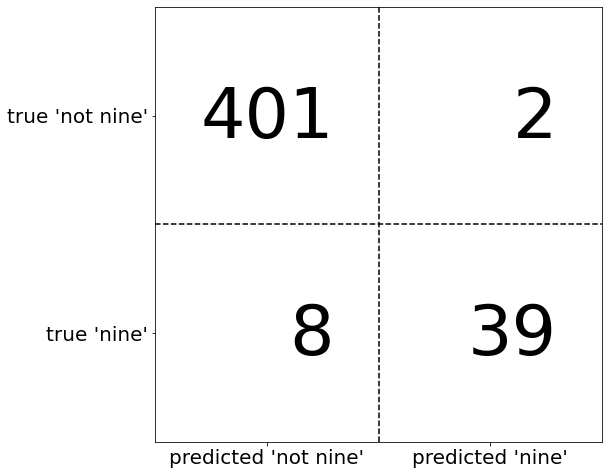

In [8]:
from helpers.plot_metrics import plot_confusion_matrix_illustration

plot_confusion_matrix_illustration()

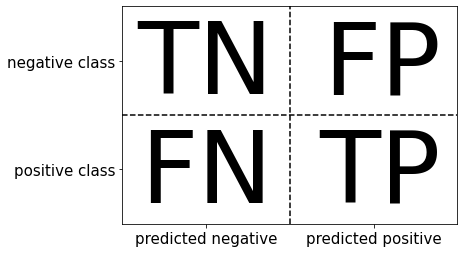

In [9]:
from helpers.plot_metrics import plot_binary_confusion_matrix

plot_binary_confusion_matrix()

In [10]:
print("Most frequent class:")
print(confusion_matrix(y_test, pred_most_frequent))
print("\nDummy model:")
print(confusion_matrix(y_test, pred_dummy))
print("\nDecision tree:")
print(confusion_matrix(y_test, pred_tree))
print("\nLogistic Regression")
print(confusion_matrix(y_test, pred_logreg))

Most frequent class:
[[403   0]
 [ 47   0]]

Dummy model:
[[367  36]
 [ 39   8]]

Decision tree:
[[390  13]
 [ 24  23]]

Logistic Regression
[[401   2]
 [  8  39]]


**Relation to accuracy**

    Accuracy = TP+TN / (TP + TN + FP + FN)

**Precision, recall, and f-score**

    Precision = TP / (TP+FP)

- Precision measures how many of the samples predicted as positive are actually positive

    Recall = TP / (TP+FN)

- Recall measures how many of the positive samples are captured by the positive predictions

    F = 2 * (precision * recall) / (precision + recall)

In [11]:
from sklearn.metrics import f1_score

In [12]:
print("f1 score most frequent: {:.2f}".format(f1_score(y_test, pred_most_frequent)))
print("f1 score dummy: {:.2f}".format(f1_score(y_test, pred_dummy)))
print("f1 score tree: {:.2f}".format(f1_score(y_test, pred_tree)))
print("f1 score logistic regression: {:.2f}".format(f1_score(y_test, pred_logreg)))

f1 score most frequent: 0.00
f1 score dummy: 0.18
f1 score tree: 0.55
f1 score logistic regression: 0.89


In [13]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred_most_frequent, target_names=["not nine", "nine"], zero_division=0))

              precision    recall  f1-score   support

    not nine       0.90      1.00      0.94       403
        nine       0.00      0.00      0.00        47

    accuracy                           0.90       450
   macro avg       0.45      0.50      0.47       450
weighted avg       0.80      0.90      0.85       450



In [14]:
print(classification_report(y_test, pred_dummy, target_names=["not nine", "nine"]))

              precision    recall  f1-score   support

    not nine       0.90      0.91      0.91       403
        nine       0.18      0.17      0.18        47

    accuracy                           0.83       450
   macro avg       0.54      0.54      0.54       450
weighted avg       0.83      0.83      0.83       450



In [15]:
print(classification_report(y_test, pred_logreg, target_names=["not nine", "nine"]))

              precision    recall  f1-score   support

    not nine       0.98      1.00      0.99       403
        nine       0.95      0.83      0.89        47

    accuracy                           0.98       450
   macro avg       0.97      0.91      0.94       450
weighted avg       0.98      0.98      0.98       450



### Taking uncertainty into account

In [16]:
from sklearn.datasets import make_blobs
from sklearn.svm import SVC

X, y = make_blobs(n_samples=(400, 50), cluster_std=[7.0, 2], random_state=22)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

svc = SVC(gamma=.05).fit(X_train, y_train)

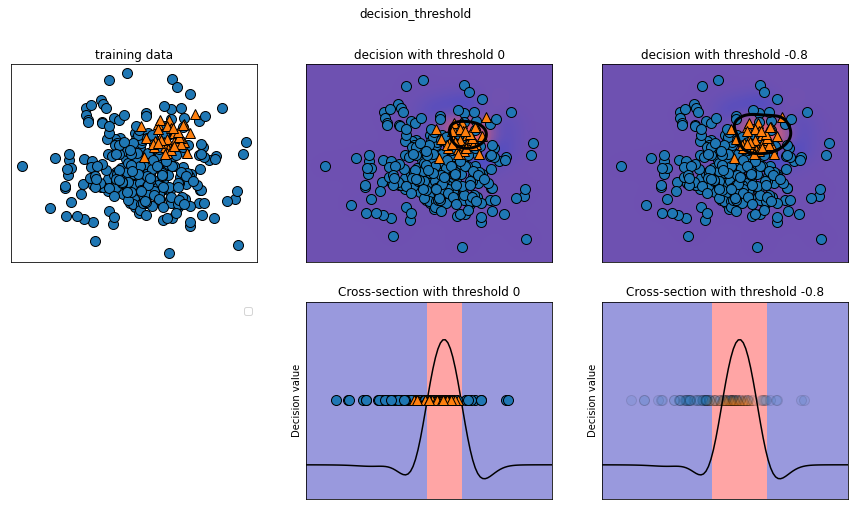

In [17]:
from helpers.plot_metrics import plot_decision_threshold

plot_decision_threshold()

In [18]:
print(classification_report(y_test, svc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93       104
           1       0.35      0.67      0.46         9

    accuracy                           0.88       113
   macro avg       0.66      0.78      0.70       113
weighted avg       0.92      0.88      0.89       113



In [19]:
y_pred_lower_threshold = svc.decision_function(X_test) > -.8

In [20]:
print(classification_report(y_test, y_pred_lower_threshold))

              precision    recall  f1-score   support

           0       1.00      0.82      0.90       104
           1       0.32      1.00      0.49         9

    accuracy                           0.83       113
   macro avg       0.66      0.91      0.69       113
weighted avg       0.95      0.83      0.87       113



### Precision-recall curves

In [21]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, svc.decision_function(X_test))

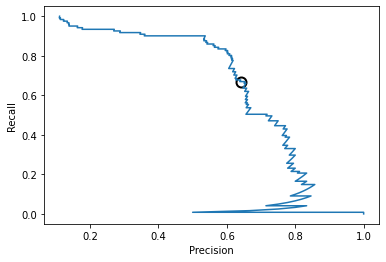

In [22]:
# Use more data points for a smoother curve
X, y = make_blobs(n_samples=(4000, 500), cluster_std=[7.0, 2], random_state=22)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
svc = SVC(gamma=.05).fit(X_train, y_train)

precision, recall, thresholds = precision_recall_curve(y_test, svc.decision_function(X_test))

# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds))
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10, label="threshold zero", fillstyle="none", c='k', mew=2)
plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.show()

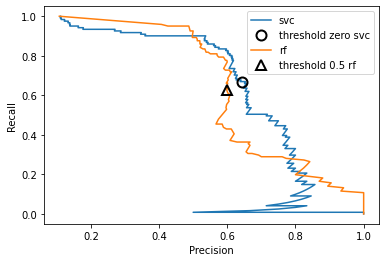

In [23]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=0, max_features=2)
rf.fit(X_train, y_train)

# RandomForestClassifier has predict_proba, but not decision_function
precision_rf, recall_rf, thresholds_rf = precision_recall_curve(y_test, rf.predict_proba(X_test)[:, 1])

plt.plot(precision, recall, label="svc")
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,label="threshold zero svc", fillstyle="none", c='k', mew=2)
plt.plot(precision_rf, recall_rf, label="rf")

close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(precision_rf[close_default_rf], recall_rf[close_default_rf], '^', c='k', markersize=10, label="threshold 0.5 rf", fillstyle="none", mew=2)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")
plt.show()

In [24]:
print(f"f1_score of random forest: {f1_score(y_test, rf.predict(X_test)):.3f}")
print(f"f1_score of svc: {f1_score(y_test, svc.predict(X_test)):.3f}")

f1_score of random forest: 0.610
f1_score of svc: 0.656


In [25]:
from sklearn.metrics import average_precision_score

ap_rf = average_precision_score(y_test, rf.predict_proba(X_test)[:, 1])
ap_svc = average_precision_score(y_test, svc.decision_function(X_test))

print(f"Average precision of random forest: {ap_rf:.3f}")
print(f"Average precision of svc: {ap_svc:.3f}")

Average precision of random forest: 0.660
Average precision of svc: 0.666


### Receiver operating characteristics (ROC) and AUC

    FPR = FP / (FP+TN)

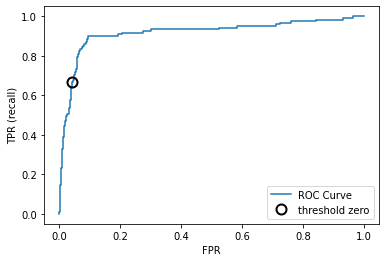

In [27]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, svc.decision_function(X_test))
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")

# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10, label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)
plt.show()

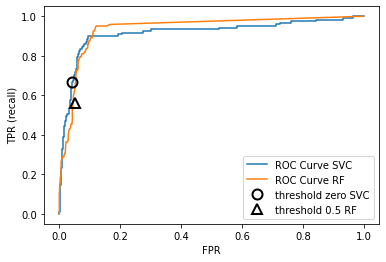

In [28]:
from sklearn.metrics import roc_curve

fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])

plt.plot(fpr, tpr, label="ROC Curve SVC")
plt.plot(fpr_rf, tpr_rf, label="ROC Curve RF")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")

plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10, label="threshold zero SVC", fillstyle="none", c='k', mew=2)

close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))

plt.plot(fpr_rf[close_default_rf], tpr[close_default_rf], '^', markersize=10, label="threshold 0.5 RF", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)
plt.show()

In [29]:
from sklearn.metrics import roc_auc_score

rf_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])
svc_auc = roc_auc_score(y_test, svc.decision_function(X_test))

print(f"AUC for Random Forest: {rf_auc:.3f}")
print(f"AUC for SVC: {svc_auc:.3f}")

AUC for Random Forest: 0.937
AUC for SVC: 0.916


gamma = 1.00 accuracy = 0.90 AUC = 0.50
gamma = 0.05 accuracy = 0.90 AUC = 1.00
gamma = 0.01 accuracy = 0.90 AUC = 1.00


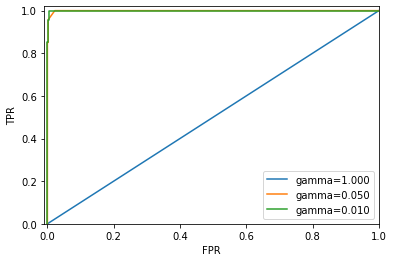

In [32]:
y = digits.target == 9

X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=0)

plt.figure()

for gamma in [1, 0.05, 0.01]:
    svc = SVC(gamma=gamma).fit(X_train, y_train)
    accuracy = svc.score(X_test, y_test)
    auc = roc_auc_score(y_test, svc.decision_function(X_test))
    fpr, tpr, _ = roc_curve(y_test , svc.decision_function(X_test))
    print(f"gamma = {gamma:.2f} accuracy = {accuracy:.2f} AUC = {auc:.2f}")
    plt.plot(fpr, tpr, label="gamma={:.3f}".format(gamma))

plt.xlabel("FPR")
plt.ylabel("TPR")
plt.xlim(-0.01, 1)
plt.ylim(0, 1.02)
plt.legend(loc="best")
plt.show()

## Metrics for Multiclass Classification

In [33]:
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, random_state=0)

lr = LogisticRegression(max_iter=10000, solver="liblinear").fit(X_train, y_train)
pred = lr.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, pred):.3f}")
print(f"Confusion matrix:\n{confusion_matrix(y_test, pred)}")

Accuracy: 0.953
Confusion matrix:
[[37  0  0  0  0  0  0  0  0  0]
 [ 0 39  0  0  0  0  2  0  2  0]
 [ 0  0 41  3  0  0  0  0  0  0]
 [ 0  0  1 43  0  0  0  0  0  1]
 [ 0  0  0  0 38  0  0  0  0  0]
 [ 0  1  0  0  0 47  0  0  0  0]
 [ 0  0  0  0  0  0 52  0  0  0]
 [ 0  1  0  1  1  0  0 45  0  0]
 [ 0  3  1  0  0  0  0  0 43  1]
 [ 0  0  0  1  0  1  0  0  1 44]]


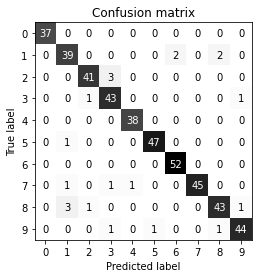

In [34]:
from helpers.tools import heatmap

scores_image = heatmap(confusion_matrix(y_test, pred), 
                       xlabel='Predicted label', 
                       ylabel='True label', 
                       xticklabels=digits.target_names, 
                       yticklabels=digits.target_names, 
                       cmap=plt.cm.gray_r, 
                       fmt="%d")

plt.title("Confusion matrix")
plt.gca().invert_yaxis()

In [36]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.89      0.91      0.90        43
           2       0.95      0.93      0.94        44
           3       0.90      0.96      0.92        45
           4       0.97      1.00      0.99        38
           5       0.98      0.98      0.98        48
           6       0.96      1.00      0.98        52
           7       1.00      0.94      0.97        48
           8       0.93      0.90      0.91        48
           9       0.96      0.94      0.95        47

    accuracy                           0.95       450
   macro avg       0.95      0.95      0.95       450
weighted avg       0.95      0.95      0.95       450



In [37]:
print(f"Micro average f1 score: {f1_score(y_test, pred, average='micro'):.3f}")
print(f"Macro average f1 score: {f1_score(y_test, pred, average='macro'):.3f}")

Micro average f1 score: 0.953
Macro average f1 score: 0.954


## Regression Metrics

## Using Evaluation Metrics in Model Selection

https://scikit-learn.org/stable/modules/model_evaluation.html

In [38]:
from sklearn.model_selection import cross_val_score

# default scoring for classification is accuracy
print(f"Default scoring: {cross_val_score(SVC(), digits.data, digits.target == 9, cv=3)}")

# providing scoring="accuracy" doesn't change the results
explicit_accuracy = cross_val_score(SVC(), digits.data, digits.target == 9, scoring="accuracy", cv=3)
print(f"Explicit accuracy scoring: {explicit_accuracy}")

roc_auc = cross_val_score(SVC(), digits.data, digits.target == 9, scoring="roc_auc", cv=3)
print(f"AUC scoring: {roc_auc}")

Default scoring: [0.97996661 0.98664441 0.98330551]
Explicit accuracy scoring: [0.97996661 0.98664441 0.98330551]
AUC scoring: [0.99557823 0.99879406 0.98964131]


In [39]:
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target == 9, random_state=0)

# we provide a somewhat bad grid to illustrate the point:
param_grid = {'gamma': [0.0001, 0.01, 0.1, 1, 10]}

# using the default scoring of accuracy:
grid = GridSearchCV(SVC(), param_grid=param_grid)

grid.fit(X_train, y_train)
print("Grid-Search with accuracy")
print("Best parameters:", grid.best_params_)
print(f"Best cross-validation score (accuracy)): {grid.best_score_:.3f}")
print(f"Test set AUC: {roc_auc_score(y_test, grid.decision_function(X_test)):.3f}")
print(f"Test set accuracy: {grid.score(X_test, y_test):.3f}")

Grid-Search with accuracy
Best parameters: {'gamma': 0.0001}
Best cross-validation score (accuracy)): 0.976
Test set AUC: 0.992
Test set accuracy: 0.973


In [40]:
# using AUC scoring instead:
grid = GridSearchCV(SVC(), param_grid=param_grid, scoring="roc_auc")
grid.fit(X_train, y_train)
print("\nGrid-Search with AUC")
print("Best parameters:", grid.best_params_)
print(f"Best cross-validation score (AUC): {grid.best_score_:.3f}")
print(f"Test set AUC: {roc_auc_score(y_test, grid.decision_function(X_test)):.3f}")
print(f"Test set accuracy: {grid.score(X_test, y_test):.3f}")


Grid-Search with AUC
Best parameters: {'gamma': 0.01}
Best cross-validation score (AUC): 0.998
Test set AUC: 1.000
Test set accuracy: 1.000
